In [43]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

In [2]:
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

In [3]:
pg = penguins[penguins['species'] == 'Gentoo']
# pg = pg[pg['sex'] == 'Male']
pg = pg[['body_mass_g','bill_length_mm']]
pg = pg.dropna()

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
y = pg['body_mass_g']
x = pg['bill_length_mm']

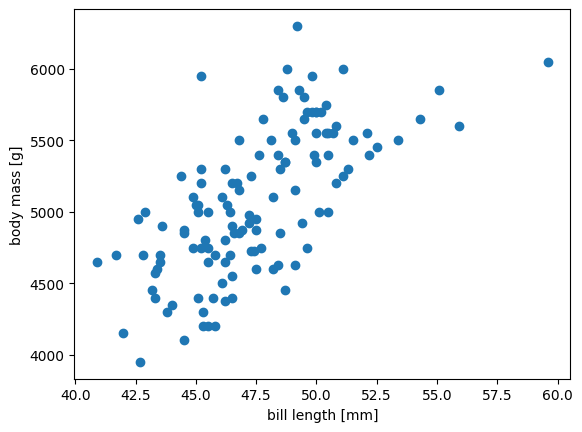

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y)

fig.savefig("scatter.png")


In [7]:
# 最小二乗法による線形回帰
lr = LinearRegression()
lr.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [8]:
y_pred = lr.predict(x.values.reshape(-1, 1))

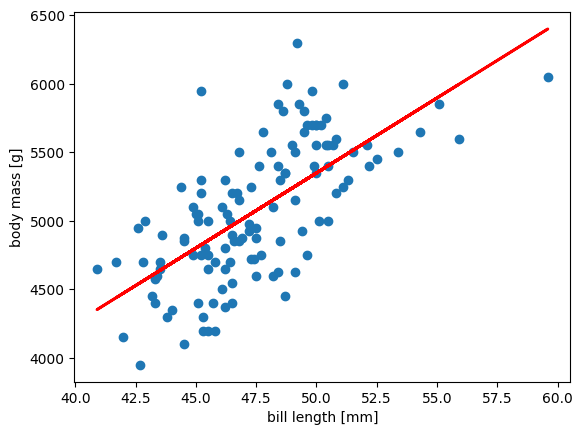

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y)
ax.plot(x, y_pred, color='red', linewidth=2, label='Predicted')

fig.savefig("lr_ls.png")

In [13]:
# It's usually necessary to scale the data for SGD
scaler = StandardScaler()
x_sc = scaler.fit_transform(x.values.reshape(-1, 1))

In [29]:
# Create a SGDRegressor model
sgd = SGDRegressor(max_iter=1000, eta0=0.01, penalty='l2')
# Train the model
sgd.fit(x_sc, y)

SGDRegressor()

In [30]:
y_pred_sgd = sgd.predict(x_sc)

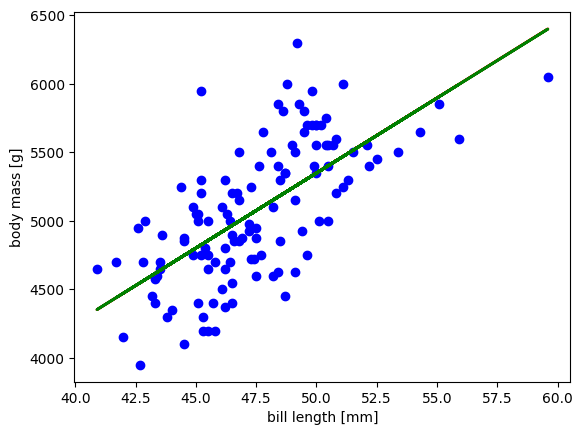

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y, color='blue')
ax.plot(x, y_pred, color='red', linewidth=2, label='Predicted')
ax.plot(x, y_pred_sgd, color='green', linewidth=2, label='Predicted')

In [64]:
# モデルの作成
sgd_hist = SGDRegressor(eta0=0.01)

# パラメータの推移を記録するためのリスト
coef_history = []
intercept_history = []

# 最大繰り返し回数
max_iter = 10

# 学習の各イテレーションごとにパラメータを記録
for _ in range(max_iter):
    sgd_hist.partial_fit(x_sc, y)
    coef_history.append(sgd_hist.coef_.copy())
    intercept_history.append(sgd_hist.intercept_.copy())

In [65]:
coef_history

[array([91.70831199]),
 array([167.58839271]),
 array([212.89198775]),
 array([243.74544101]),
 array([264.83229146]),
 array([280.91617457]),
 array([292.12753943]),
 array([300.78037041]),
 array([307.98392205]),
 array([313.26018487])]

In [66]:
intercept_history

[array([1956.86884403]),
 array([2848.28771872]),
 array([3417.52287681]),
 array([3811.1080566]),
 array([4094.77274829]),
 array([4305.08343143]),
 array([4464.31592043]),
 array([4587.36662354]),
 array([4682.55171254]),
 array([4757.39048928])]

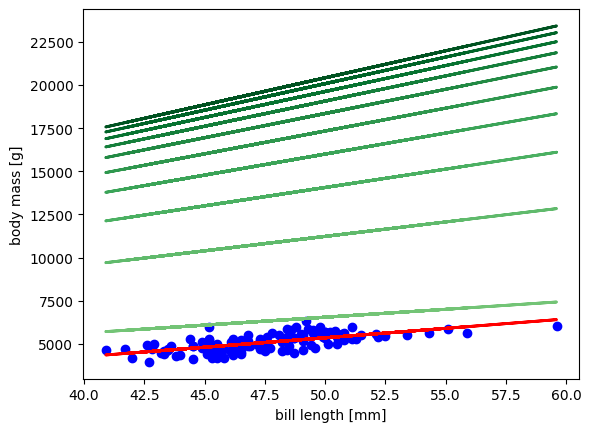

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel="bill length [mm]", ylabel="body mass [g]")

ax.scatter(x, y, color='blue')
ax.plot(x, y_pred, color='red', linewidth=2, label='Predicted')
for _ in range(max_iter):
    y_pred_sgd_hist = coef_history[_] * x + intercept_history[_]
    ax.plot(x, y_pred_sgd_hist, color=cm.Greens((_/max_iter)/2+0.5), linewidth=2, label='Predicted')